# Spis Treści

- [Importowanie bibliotek](#Importowanie-bibliotek)
- [Wczytywanie zbioru z danymi rowerowymi](#Wczytywanie-zbioru-z-danymi-rowerowymi)
  - [Filtrowanie danych](#Filtrowanie-danych)
  - [Analiza wstępna](#Analiza-wstepna)
- [Wczytywanie zbioru z danymi pogodowymi](#Wczytywanie-zbioru-z-danymi-pogodowymi)
  - [Objaśnienie zmiennych](#Objasnienie-zmiennych)
  - [Brakujące dane](#Brakujace-dane)
---


# Importowanie bibliotek

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

---

# Wczytywanie zbioru z danymi rowerowymi

In [2]:
data = pd.read_csv('Liczniki - dzienne.csv',index_col='Date')
data.index = pd.to_datetime(data.index,format='%Y-%m-%d')
data.head()

,Armii Krajowej,Bora-Komorowskiego,Bulwary,Dworzec Główny,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,...,Nowohucka,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm]
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-18,NaN,NaN,421,NaN,NaN,NaN,NaN,NaN,560,907,...,NaN,NaN,NaN,212,329,14.2,2.1,6.3,-0.6,0.0
2016-11-19,NaN,NaN,328,NaN,NaN,NaN,NaN,NaN,232,438,...,NaN,NaN,NaN,206,151,14.2,3.8,9.2,1.0,3.2
2016-11-20,NaN,NaN,539,NaN,NaN,NaN,NaN,NaN,285,549,...,NaN,NaN,NaN,212,182,12.9,4.9,8.0,1.5,0.0
2016-11-21,NaN,NaN,1002,NaN,NaN,NaN,NaN,NaN,953,1501,...,NaN,NaN,NaN,382,479,18.4,5.8,10.3,2.5,0.0
2016-11-22,NaN,NaN,1132,,NaN,NaN,NaN,NaN,1039,1626,...,NaN,NaN,NaN,386,502,15.8,3.1,7.8,0.5,0.0


## Filtrowanie danych

In [3]:
# complete data starts on '2020-12-08'
data = data[data.index > '2020-12-08']

measuring_stations = ['Armii Krajowej','Bora-Komorowskiego','Bulwary','Dworzec Główny',
                      'Grzegórzecka','Kamieńskiego','Klimeckiego','Kopernika','Kotlarska',
                      'Mogilska','Monte Cassino','Niepołomska','Nowohucka','Smoleńsk',
                      'Tyniecka','Wadowicka','Wielicka']

bikers_data = data[measuring_stations]
bikers_data = bikers_data.astype('float64')
bikers_data['Total'] = bikers_data.sum(axis=1)
bikers_data

,Armii Krajowej,Bora-Komorowskiego,Bulwary,Dworzec Główny,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,Monte Cassino,Niepołomska,Nowohucka,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Total
Date,,,,,,,,,,,,,,,,,,
2020-12-09,238.0,323.0,595.0,731.0,942.0,194.0,516.0,1121.0,1008.0,1230.0,740.0,173.0,223.0,573.0,301.0,527.0,570.0,10005.0
2020-12-10,143.0,218.0,413.0,561.0,737.0,152.0,406.0,895.0,776.0,890.0,535.0,94.0,166.0,420.0,220.0,404.0,425.0,7455.0
2020-12-11,174.0,198.0,365.0,550.0,863.0,154.0,375.0,901.0,784.0,878.0,571.0,81.0,176.0,433.0,190.0,474.0,398.0,7565.0
2020-12-12,127.0,140.0,316.0,344.0,656.0,152.0,215.0,532.0,513.0,533.0,397.0,136.0,132.0,319.0,185.0,259.0,198.0,5154.0
2020-12-13,140.0,128.0,331.0,293.0,619.0,96.0,193.0,494.0,443.0,434.0,387.0,187.0,127.0,267.0,219.0,215.0,177.0,4750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28,999.0,1095.0,2239.0,3100.0,2825.0,1580.0,1911.0,2932.0,3373.0,4045.0,2667.0,1080.0,1233.0,1263.0,1903.0,2057.0,1828.0,36130.0
2025-05-29,737.0,613.0,1146.0,1942.0,1919.0,806.0,1013.0,1841.0,1927.0,2452.0,1473.0,401.0,667.0,870.0,868.0,1182.0,1019.0,20876.0
2025-05-30,1031.0,1025.0,2023.0,2730.0,2555.0,1438.0,1677.0,2490.0,2736.0,3411.0,2228.0,854.0,1023.0,1292.0,1646.0,1958.0,1631.0,31748.0


## Analiza wstepna

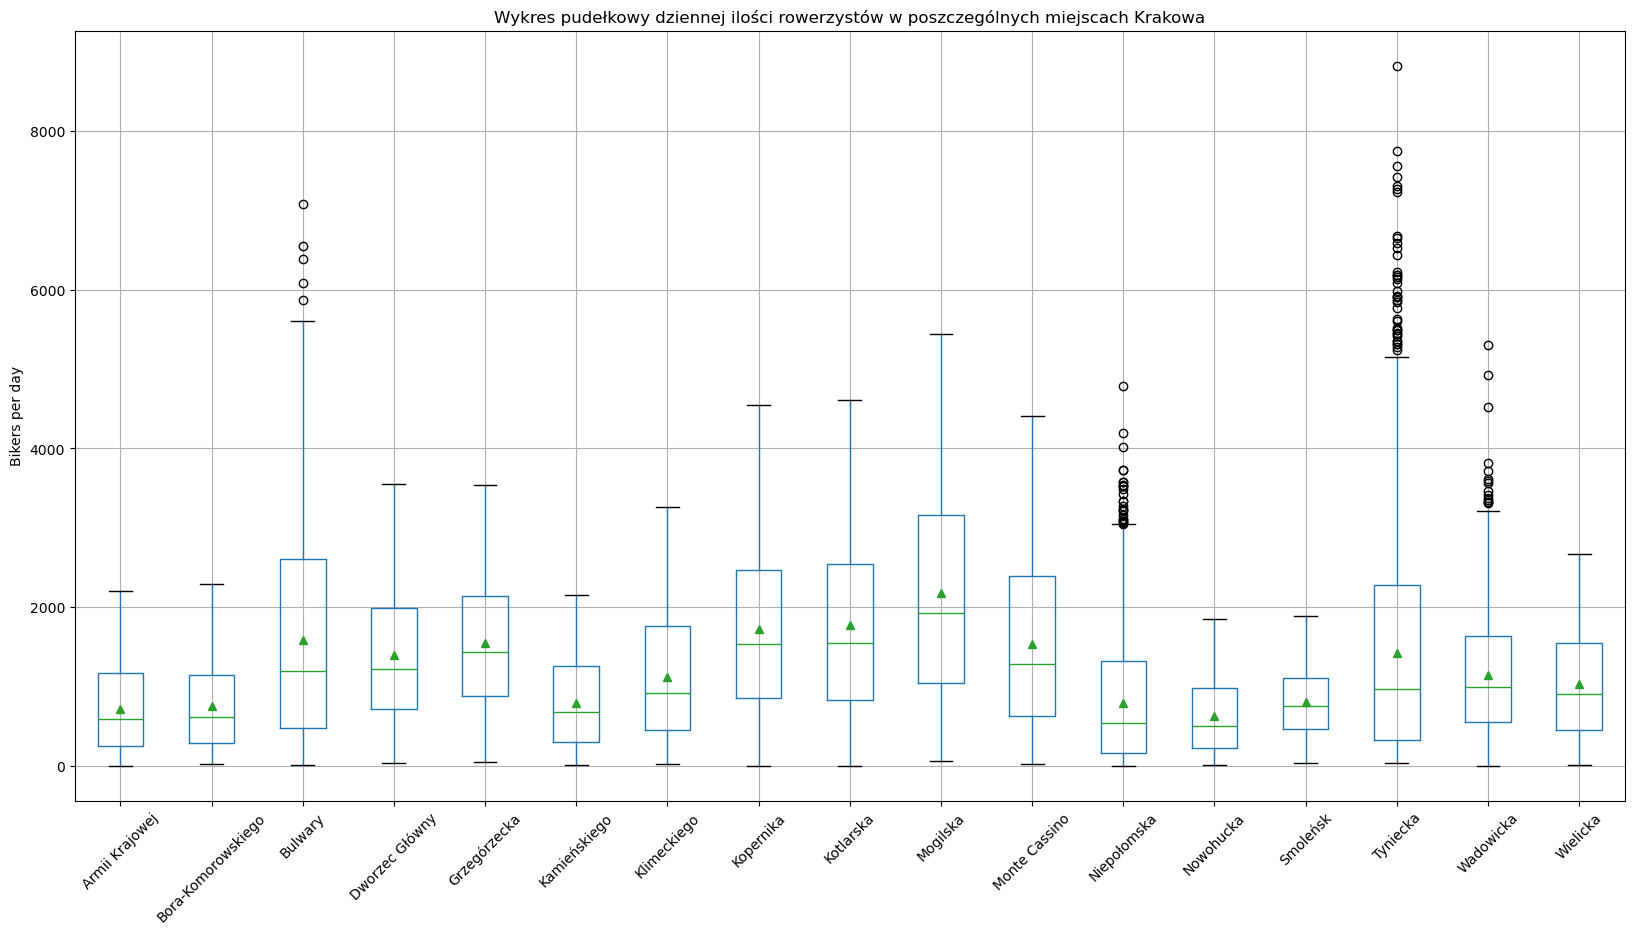

,Armii Krajowej,Bora-Komorowskiego,Bulwary,Dworzec Główny,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,Monte Cassino,Niepołomska,Nowohucka,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Total
min,0.000000,26.000000,14.000000,31.000000,49.000000,7.000000,20.000000,0.000000,0.000000,53.000000,26.000000,0.000000,11.000000,35.000000,36.000000,1.000000,4.000000,709.00000
max,2207.000000,2285.000000,7075.000000,3545.000000,3543.000000,2156.000000,3266.000000,4552.000000,4606.000000,5436.000000,4407.000000,4781.000000,1847.000000,1889.000000,8824.000000,5309.000000,2672.000000,55156.00000
mean,719.663814,751.556846,1581.623472,1389.650978,1548.423594,796.133863,1121.893643,1722.268949,1774.170538,2172.120416,1530.496944,790.959046,621.352294,797.042176,1426.669927,1142.042176,1032.507335,20918.19621
median,590.000000,612.500000,1198.500000,1223.000000,1429.500000,679.000000,919.500000,1539.000000,1551.000000,1920.000000,1282.000000,541.500000,503.000000,746.500000,961.500000,988.000000,905.000000,18096.00000


In [4]:
fig,axes = plt.subplots(figsize=(20,10))

bikers_data[measuring_stations].boxplot(showmeans=True)
axes.set_title('Wykres pudełkowy dziennej ilości rowerzystów w poszczególnych miejscach Krakowa')
axes.set_ylabel('Bikers per day')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

bikers_data_stats = bikers_data.agg(['min','max','mean','median'])
bikers_data_stats

### Trendy roczne
Możemy tutaj zauważyć, że ogólny trend ruchu rowerowego w Krakowie powtarza się co roku <br>
Kolejną rzeczą wartą odnotowania jest fakt, że pandemia Covid-19 nie powstrzymała Krakowian od poruszania się rowerem po mieście, <br>
choć od momentu stopniowego łagodzenia obostrzeń na wiosnę 2021 można zauważyć więcej peak'ów

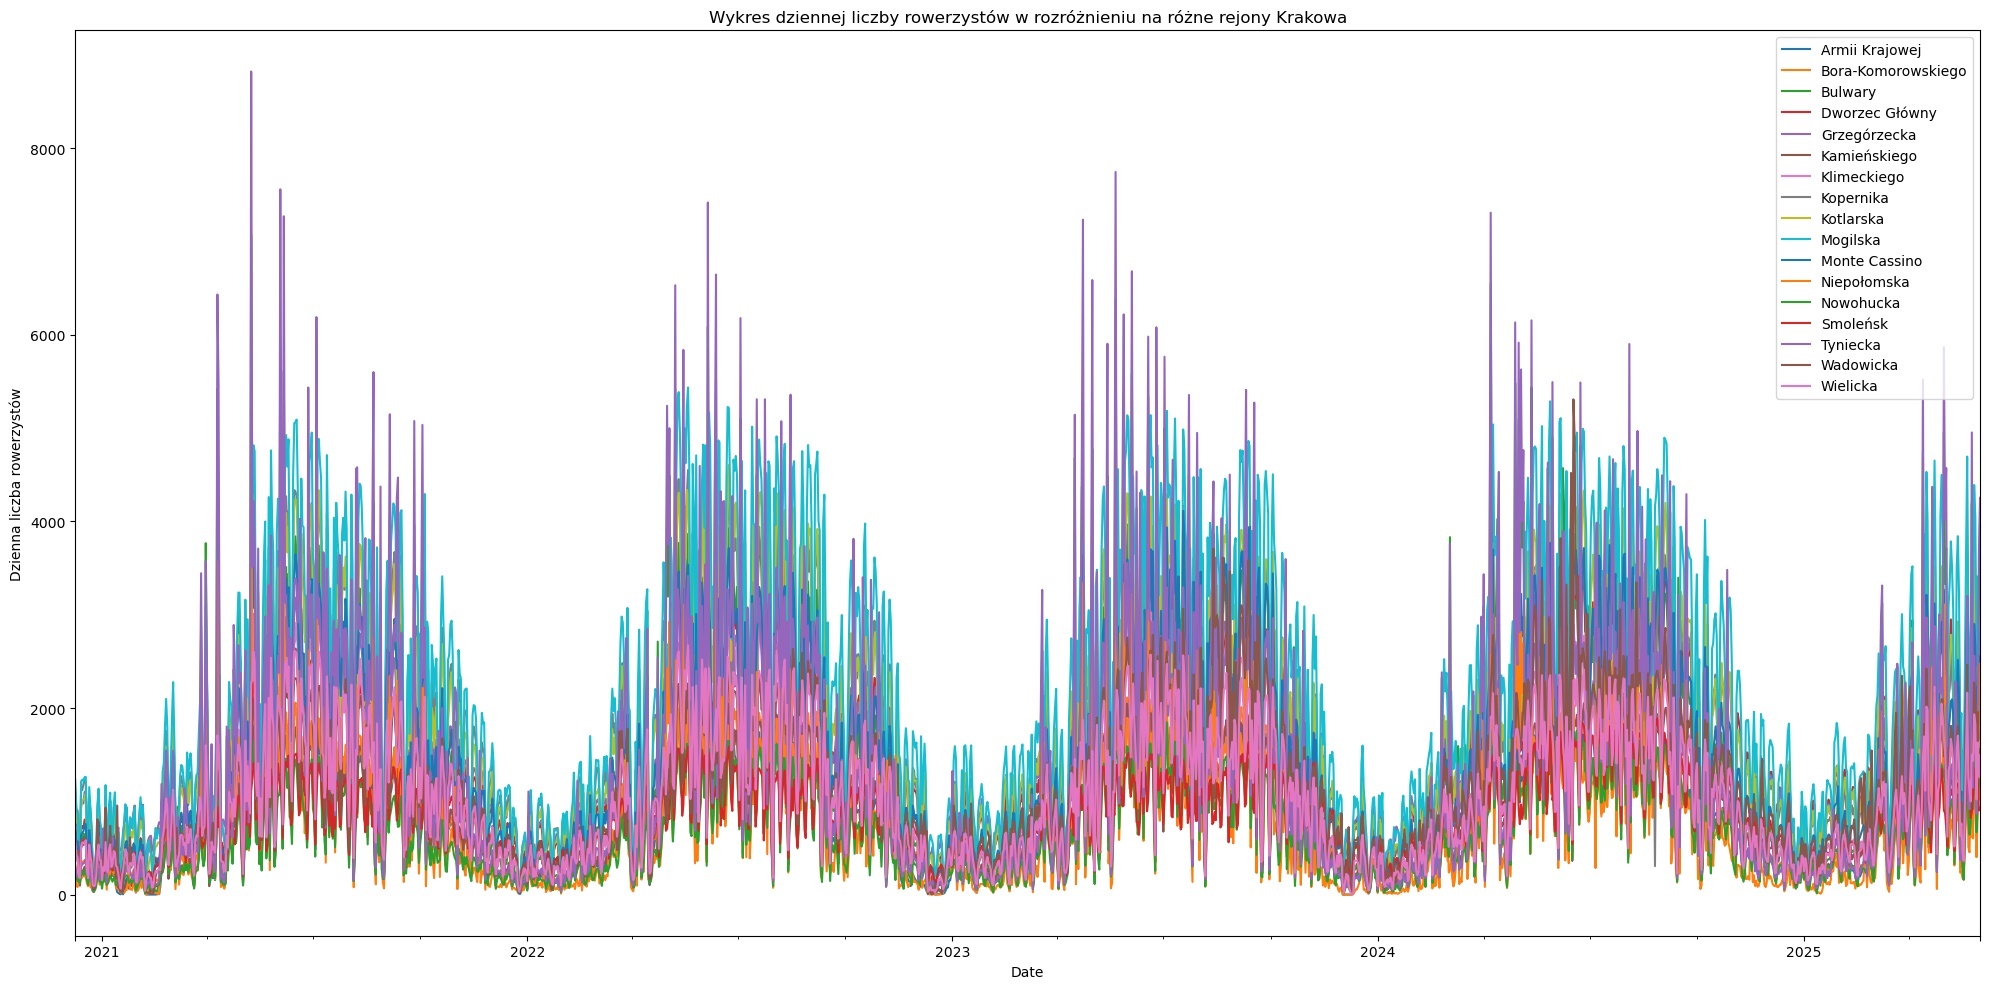

In [214]:
fig,ax = plt.subplots(figsize=(20,10))
bikers_data[measuring_stations].plot(ax=ax)
ax.set_title('Wykres dziennej liczby rowerzystów w rozróżnieniu na różne rejony Krakowa')
ax.set_ylabel('Dzienna liczba rowerzystów')
plt.tight_layout()
plt.show()

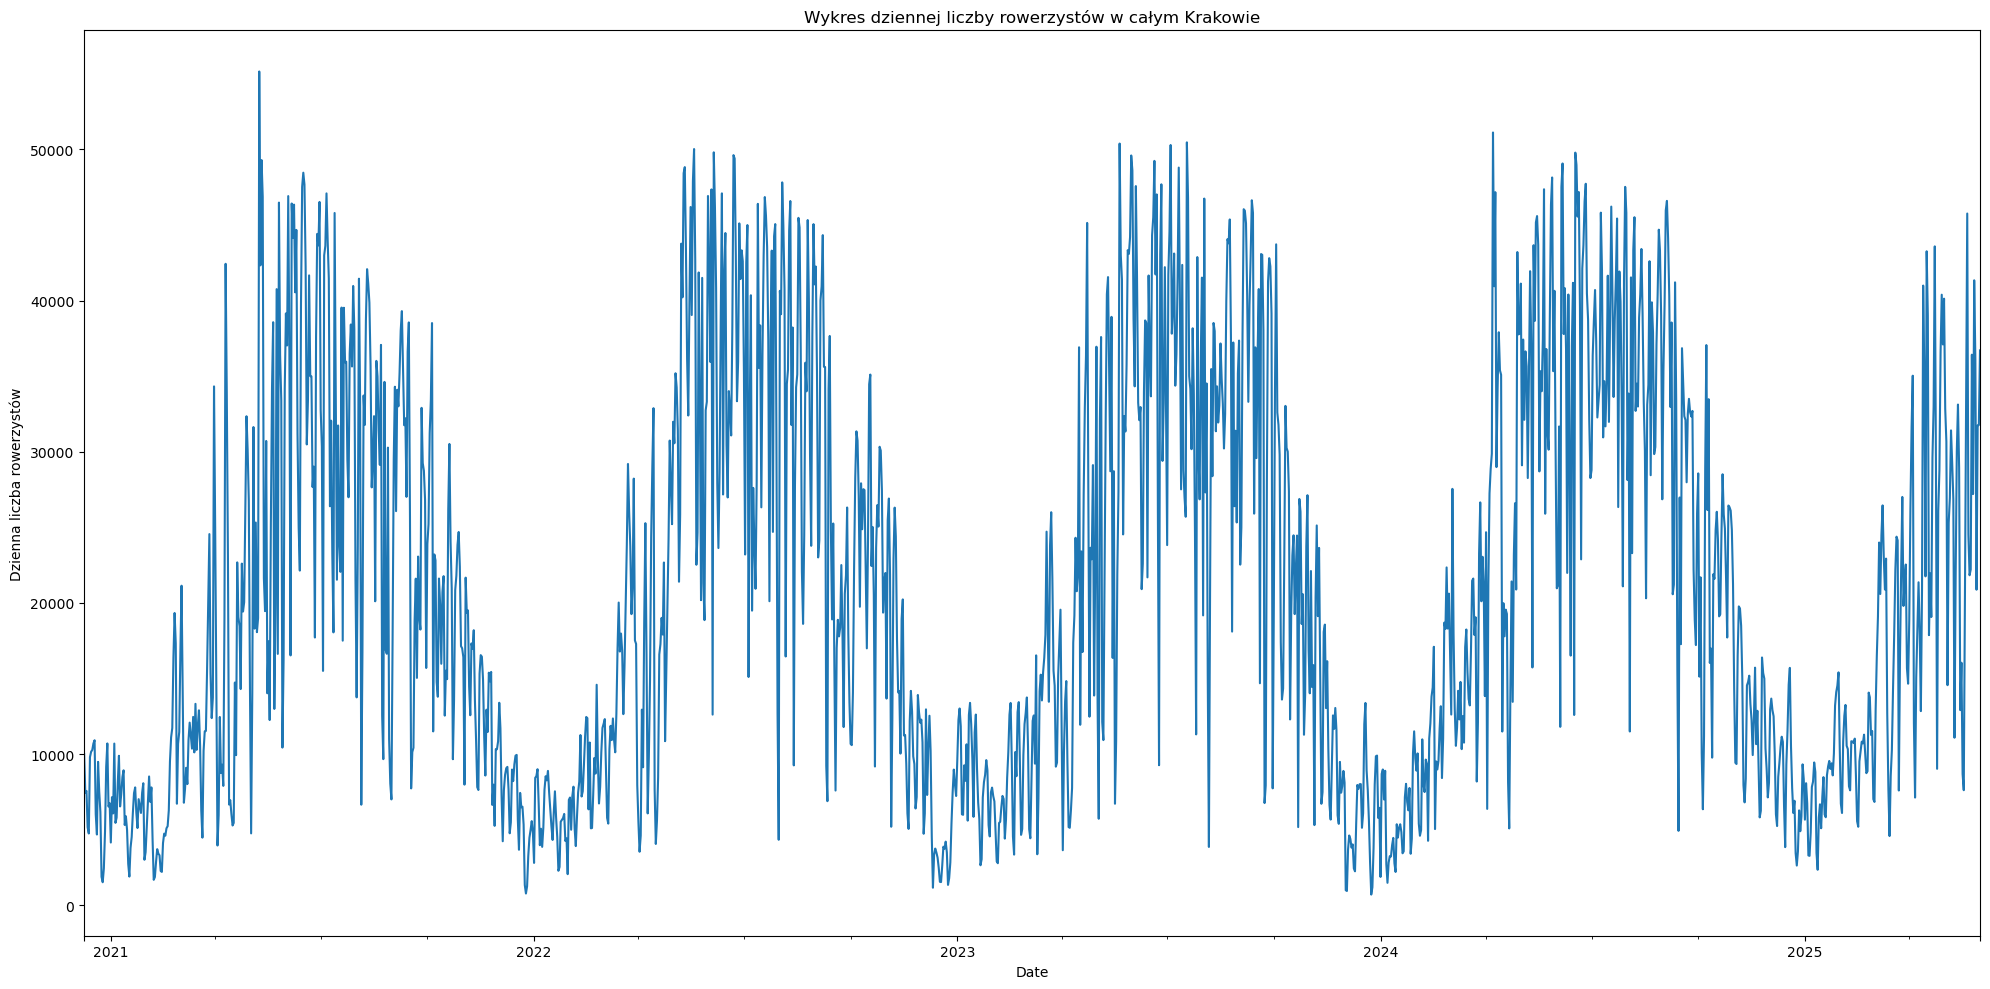

In [6]:
fig,ax = plt.subplots(figsize=(20,10))
bikers_data['Total'].plot(ax=ax)
ax.set_ylabel('Dzienna liczba rowerzystów')
ax.set_title('Wykres dziennej liczby rowerzystów w całym Krakowie')
plt.tight_layout()
plt.show()

In [7]:
#checking where people ride more during weekends

outliers = ['Bulwary','Niepołomska','Tyniecka','Wadowicka']
weekend_trace = []

for col in measuring_stations:
    weekday_mean = np.mean(bikers_data[bikers_data.index.dayofweek < 5][col])
    weekend_mean = np.mean(bikers_data[bikers_data.index.dayofweek >= 5][col])
    if weekend_mean > weekday_mean: weekend_trace.append(col)
    if col in outliers: print(f'Średnia wartość w tygodniu dla {col}: {weekday_mean}\nŚrednia wartość w weekend dla {col}: {weekend_mean}\n')

srednia_tydzien = np.mean(bikers_data[bikers_data.index.dayofweek < 5]['Total'])
srednia_weekend = np.mean(bikers_data[bikers_data.index.dayofweek >= 5]['Total'])



print(f'Lista mierników z większą ilością rowerzystów w weekend niż w tygodniu: {weekend_trace}\n')
# print(f'Średnia wartość w tygodniu dla całego Krakowa: {np.mean(bikers_data[bikers_data.index.dayofweek < 5]['Total'])}\nŚrednia wartość w weekend dla całego Krakowa: {np.mean(bikers_data[bikers_data.index.dayofweek >= 5]['Total'])}\n')
print(f'Średnia wartość w tygodniu dla całego Krakowa: {srednia_tydzien}\nŚrednia wartość w weekend dla całego Krakowa: {srednia_weekend}')

Średnia wartość w tygodniu dla Bulwary: 1525.7979452054794
Średnia wartość w weekend dla Bulwary: 1720.948717948718

Średnia wartość w tygodniu dla Niepołomska: 697.2662671232877
Średnia wartość w weekend dla Niepołomska: 1024.7905982905984

Średnia wartość w tygodniu dla Tyniecka: 1239.2080479452054
Średnia wartość w weekend dla Tyniecka: 1894.5235042735044

Średnia wartość w tygodniu dla Wadowicka: 1280.1190068493152
Średnia wartość w weekend dla Wadowicka: 797.4401709401709

Lista mierników z większą ilością rowerzystów w weekend niż w tygodniu: ['Bulwary', 'Niepołomska', 'Tyniecka']

Średnia wartość w tygodniu dla całego Krakowa: 22432.815924657534
Średnia wartość w weekend dla całego Krakowa: 17138.119658119656


### weź zrob z tego np. barplota z roznymi kolorami weekend nie weekend zeby bylo graficznie ladnie

Średnia ilość rowerzystów w weekend różni się od średniej liczby rowerzystów w tygodniu, zatem dzień tygodnia może mieć wpływ na liczbę rowerzystów. <br>
Szczególnie jest to widoczne dla miejsc na popularnych trasach rowerowych, gdzie ludzie prędzej jadą na wycieczkę niż do pracy lub szkoły

In [215]:
bikers_data['Week day'] = bikers_data.index.dayofweek

---

# Wczytywanie zbioru z danymi pogodowymi

In [216]:
data2 = pd.read_csv('weather_data.csv',index_col='date')
data2.index = pd.to_datetime(data2.index,format='%Y-%m-%d %H:%M:%S')
data2 = data2[data2.index > '2020-12-08']
data2 = data2[data2.index < '2025-06-02']
data2 = data2.drop(['tsun','wdir'],axis=1)
data2

,tavg,tmin,tmax,prcp,snow,wspd,wpgt,pres
date,,,,,,,,
2020-12-09,-1.9,-2.7,-0.5,0.0,NaN,21.6,37.0,1015.6
2020-12-10,-1.7,-2.8,-0.4,0.0,10.0,15.9,38.9,1010.6
2020-12-11,-1.2,-3.0,0.2,2.5,20.0,8.6,22.2,1009.4
2020-12-12,0.2,-1.0,1.3,0.0,10.0,12.2,25.9,1006.5
2020-12-13,0.0,-0.3,1.3,0.0,NaN,4.8,13.0,1013.9
...,...,...,...,...,...,...,...,...
2025-05-28,15.3,7.0,22.7,0.0,NaN,13.0,37.0,1013.5
2025-05-29,14.1,12.0,17.3,1.3,NaN,17.3,44.5,1014.2
2025-05-30,13.8,8.0,18.6,1.8,NaN,13.9,33.3,1019.9


## Objasnienie zmiennych

**tavg** - średnia temperatura [°C]

**tmin** - minimalna temperatura [°C]

**tmax** - maksymalna temperatura [°C]

**prcp** - opady atmosferyczne [mm]

**snow** - grubość pokrywy śnieżnej [cm]

**wspd** - prędkość wiatru [km/h]

**wpgt** - najszybszy poryw wiatru [km/h]

**pres** - ciśnienie atmosferyczne [hPa]

## Brakujace dane

In [217]:
for col in data2.columns:
    print(f'Liczba brakujących wartości dla {col}: {data2[col].isna().sum()}\n')

Liczba brakujących wartości dla tavg: 0

Liczba brakujących wartości dla tmin: 0

Liczba brakujących wartości dla tmax: 0

Liczba brakujących wartości dla prcp: 131

Liczba brakujących wartości dla snow: 1509

Liczba brakujących wartości dla wspd: 0

Liczba brakujących wartości dla wpgt: 11

Liczba brakujących wartości dla pres: 0



Dla NaN w snow podmieniamy NaN na 0, ponieważ brakujące dane najprawdopodobniej oznaczają zerowy poziom grubości pokrywy śnieżnej. Brakujące dane w wpgt pochodzą z 11-dniowego okresu 03-06-2022 - 13-06-2022, przyczyna brakujących danych jest nieznana choć można przypuszczać, że to przez awarię miernika lub prace remontowe. Ze względu na niewielką ilość brakujących danych usuniemy rekordy z tymi datami. Dla NaN w prcp ciężko znaleźć sensowny powód występowania, zakładamy, że jest to spowodowane awarią sprzętu i interpolujemy liniowo dane w wierszach z brakującymi danymi.

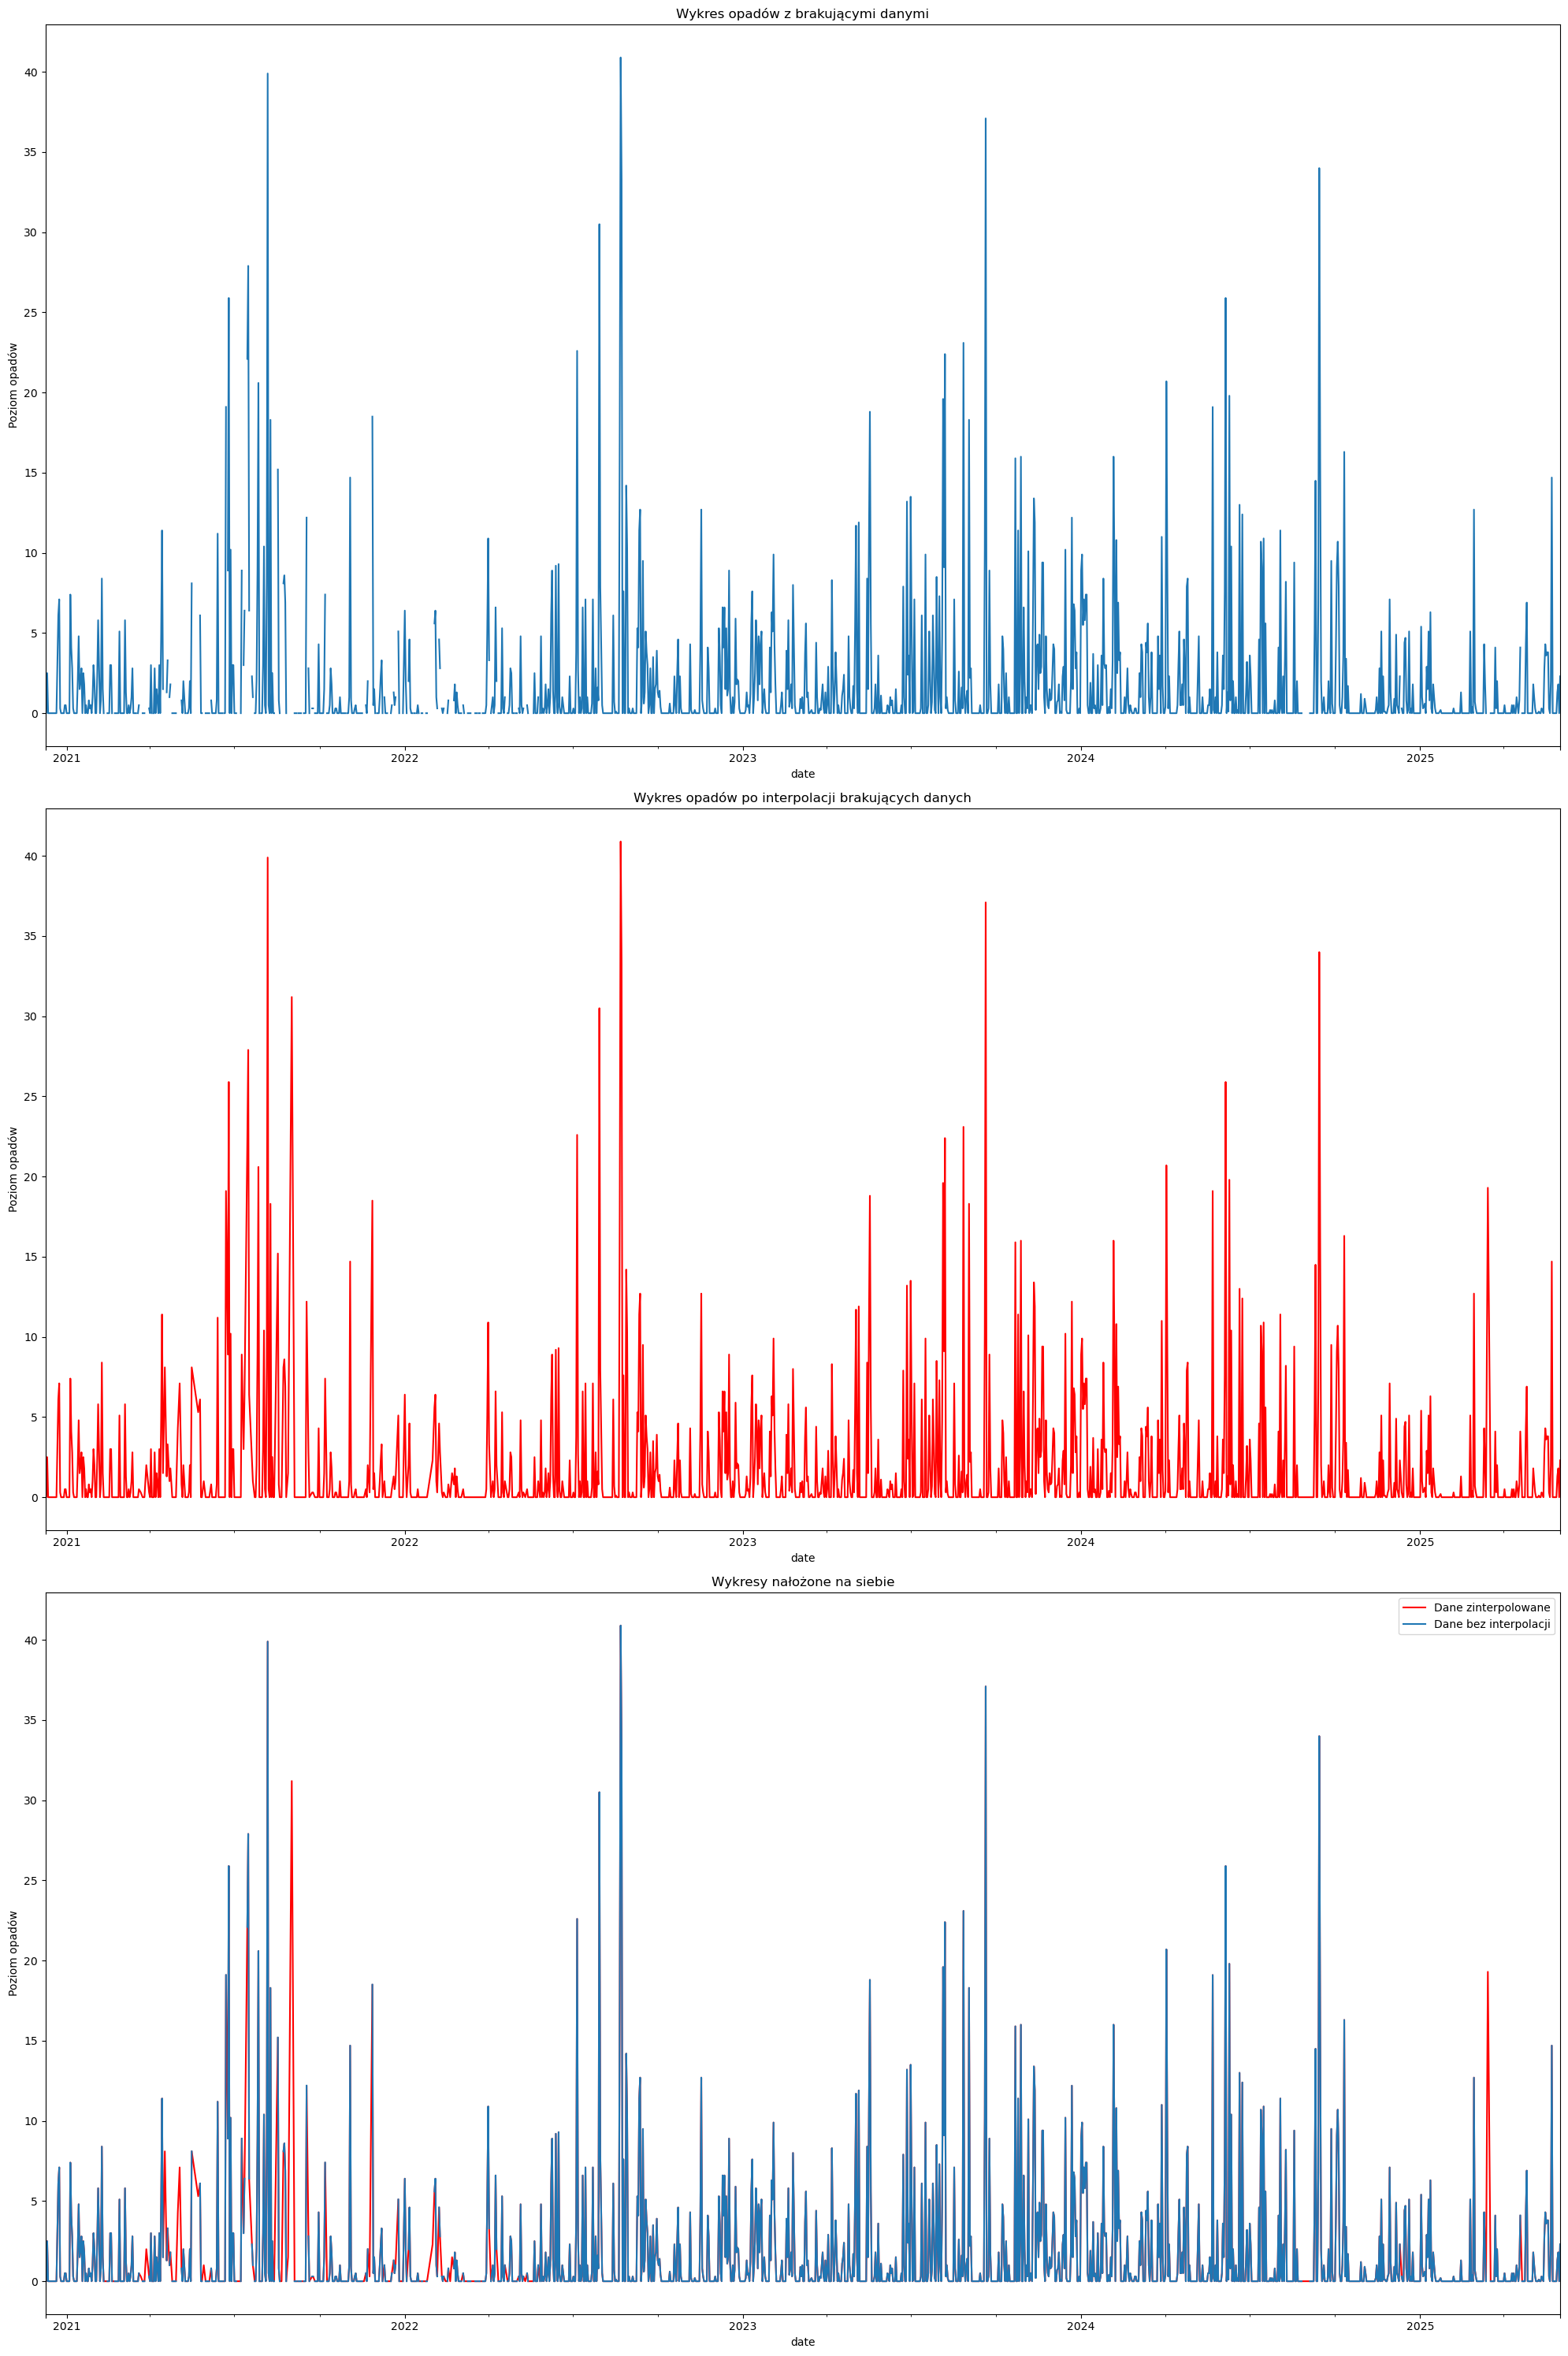

In [218]:
data2['snow'] = data2['snow'].fillna(0)
data2['opady_interp'] = data2['prcp'].interpolate(method='linear')

fig,ax = plt.subplots(3,1,figsize=(20,30))

data2['prcp'].plot(ax=ax[0])
ax[0].set_title('Wykres opadów z brakującymi danymi')
ax[0].set_ylabel('Poziom opadów')

data2['opady_interp'].plot(ax=ax[1],color='red')
ax[1].set_title('Wykres opadów po interpolacji brakujących danych')
ax[1].set_ylabel('Poziom opadów')

data2['opady_interp'].plot(ax=ax[2],color='red')
data2['prcp'].plot(ax=ax[2])
ax[2].set_title('Wykresy nałożone na siebie')
ax[2].set_ylabel('Poziom opadów')
ax[2].legend(labels=['Dane zinterpolowane','Dane bez interpolacji'])

plt.tight_layout()
plt.show()

### Łączenie danych 

In [220]:
bikers_data.head()

,Armii Krajowej,Bora-Komorowskiego,Bulwary,Dworzec Główny,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,Monte Cassino,Niepołomska,Nowohucka,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Total,Week day
Date,,,,,,,,,,,,,,,,,,,
2020-12-09,238.0,323.0,595.0,731.0,942.0,194.0,516.0,1121.0,1008.0,1230.0,740.0,173.0,223.0,573.0,301.0,527.0,570.0,10005.0,2
2020-12-10,143.0,218.0,413.0,561.0,737.0,152.0,406.0,895.0,776.0,890.0,535.0,94.0,166.0,420.0,220.0,404.0,425.0,7455.0,3
2020-12-11,174.0,198.0,365.0,550.0,863.0,154.0,375.0,901.0,784.0,878.0,571.0,81.0,176.0,433.0,190.0,474.0,398.0,7565.0,4
2020-12-12,127.0,140.0,316.0,344.0,656.0,152.0,215.0,532.0,513.0,533.0,397.0,136.0,132.0,319.0,185.0,259.0,198.0,5154.0,5
2020-12-13,140.0,128.0,331.0,293.0,619.0,96.0,193.0,494.0,443.0,434.0,387.0,187.0,127.0,267.0,219.0,215.0,177.0,4750.0,6


In [221]:
data2.head()

,tavg,tmin,tmax,prcp,snow,wspd,wpgt,pres,opady_interp
date,,,,,,,,,
2020-12-09,-1.9,-2.7,-0.5,0.0,0.0,21.6,37.0,1015.6,0.0
2020-12-10,-1.7,-2.8,-0.4,0.0,10.0,15.9,38.9,1010.6,0.0
2020-12-11,-1.2,-3.0,0.2,2.5,20.0,8.6,22.2,1009.4,2.5
2020-12-12,0.2,-1.0,1.3,0.0,10.0,12.2,25.9,1006.5,0.0
2020-12-13,0.0,-0.3,1.3,0.0,0.0,4.8,13.0,1013.9,0.0


In [222]:
df = bikers_data[['Total', 'Week day']]
df['is_weekend'] = (df['Week day'] >= 5).astype(int)
df = df[['Total', 'is_weekend', 'Week day']]
df = pd.merge(left=df, right=data2, left_on=df.index, right_on=data2.index)
df.index = df['key_0']
df = df.drop(['key_0'], axis=1)
df.index.name = 'Date'
df

,Total,is_weekend,Week day,tavg,tmin,tmax,prcp,snow,wspd,wpgt,pres,opady_interp
Date,,,,,,,,,,,,
2020-12-09,10005.0,0,2,-1.9,-2.7,-0.5,0.0,0.0,21.6,37.0,1015.6,0.0
2020-12-10,7455.0,0,3,-1.7,-2.8,-0.4,0.0,10.0,15.9,38.9,1010.6,0.0
2020-12-11,7565.0,0,4,-1.2,-3.0,0.2,2.5,20.0,8.6,22.2,1009.4,2.5
2020-12-12,5154.0,1,5,0.2,-1.0,1.3,0.0,10.0,12.2,25.9,1006.5,0.0
2020-12-13,4750.0,1,6,0.0,-0.3,1.3,0.0,0.0,4.8,13.0,1013.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28,36130.0,0,2,15.3,7.0,22.7,0.0,0.0,13.0,37.0,1013.5,0.0
2025-05-29,20876.0,0,3,14.1,12.0,17.3,1.3,0.0,17.3,44.5,1014.2,1.3
2025-05-30,31748.0,0,4,13.8,8.0,18.6,1.8,0.0,13.9,33.3,1019.9,1.8


### Korelacje między zmiennymi

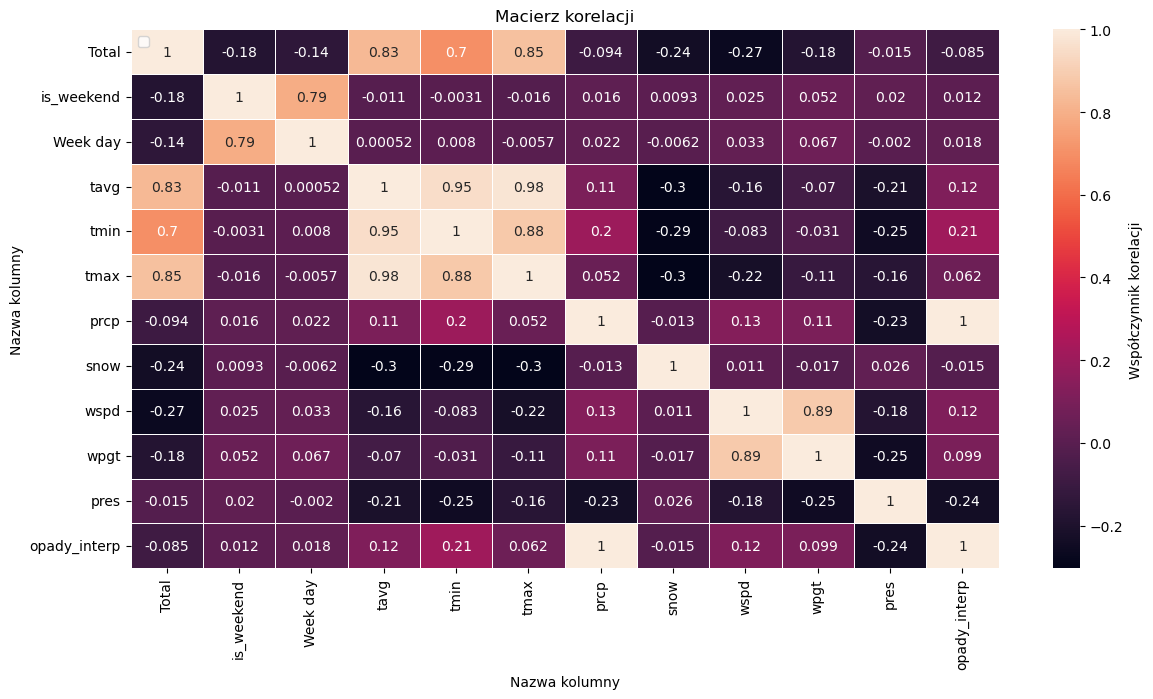

In [225]:
import seaborn as sns
fig = plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidth=0.5, cbar_kws={'label': 'Współczynnik korelacji'})
plt.xlabel('Nazwa kolumny')
plt.ylabel('Nazwa kolumny')
plt.title('Macierz korelacji')
plt.legend()
plt.show()

Można zauważyć, że największy wpływ na ruch rowerowy w całym mieście ma maksymalna temperatura danego dnia. <br>
Niestety poza samą temperaturą Krakowianie są całkiem odporni na warunki pogodowe jeśli sugerować się samą macierzą korelacji <br>
Warto też odnotować dość oczywistą zależność między średnią, minimalną i maksymalną temperaturą, a także między średnią prędkością wiatru, <br>
a największym porywem wiatru. Zmienne te są ze sobą wysoko skorelowane, co będzie miało znaczenie przy wyborze cech do stworzenia późniejszego <br>
modelu przewidywania ruchu rowerowego w Krakowie

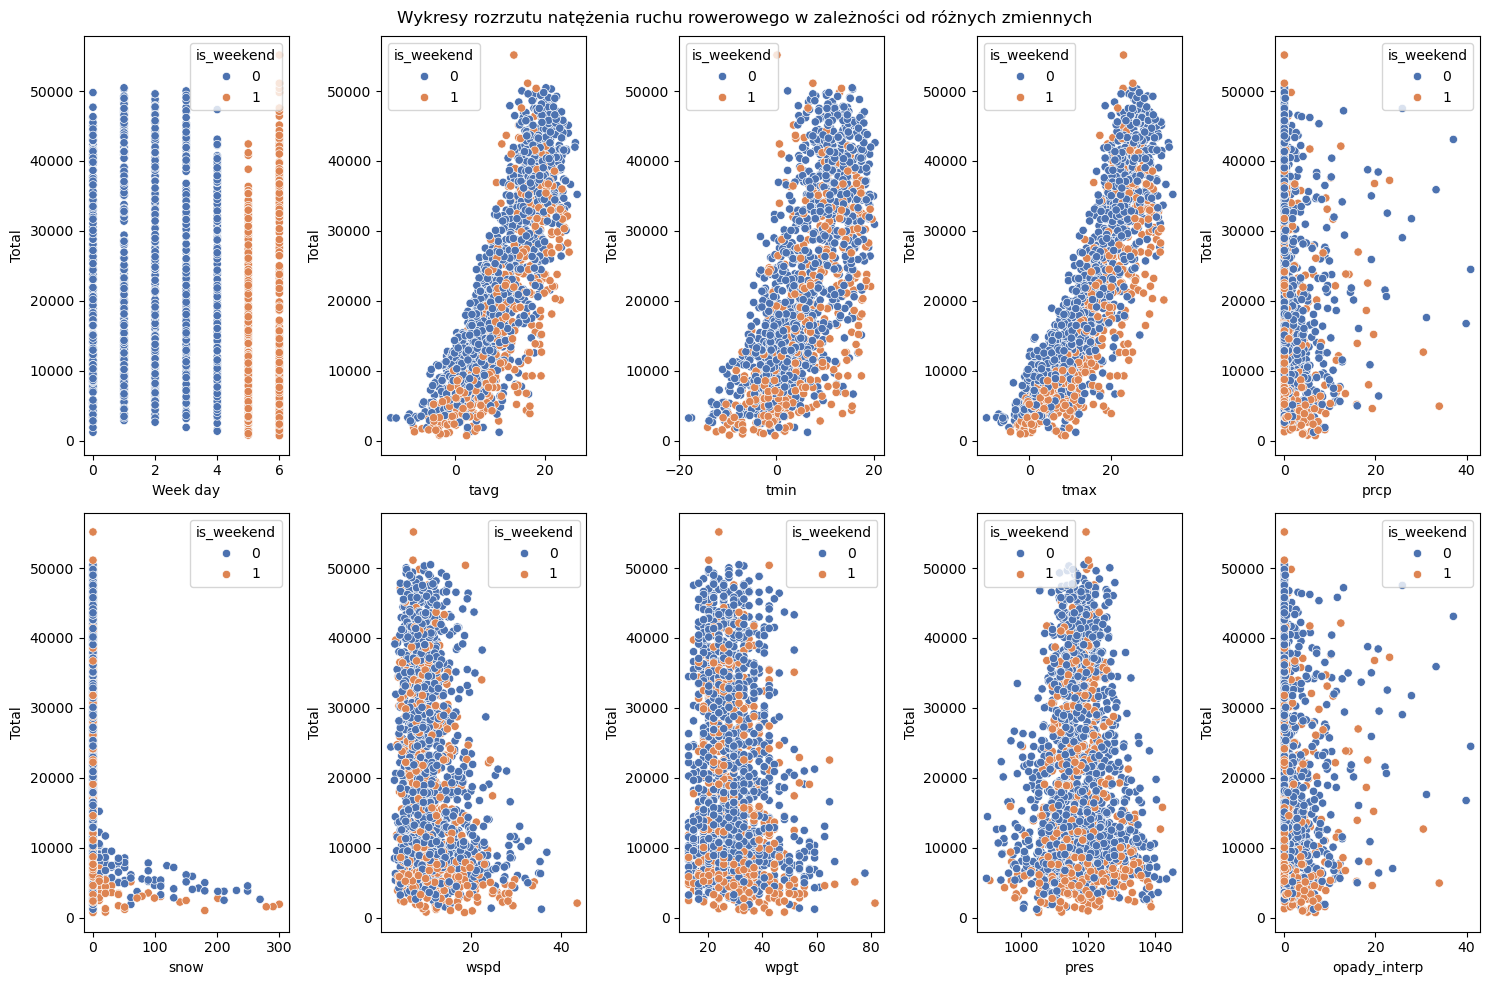

In [238]:
fig, axes = plt.subplots(2, 5, figsize=(15,10))
axes = axes.ravel()
cols = df.columns.drop(['Total', 'is_weekend']).values
for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y='Total', ax=axes[i], hue='is_weekend', palette='deep')
plt.suptitle('Wykresy rozrzutu natężenia ruchu rowerowego w zależności od różnych zmiennych')
plt.tight_layout()
plt.show()

Jak można było się spodziewać, temperatura ma oczywisty wpływ na natężenie ruchu rowerowego. <br>
Widać, że najbardziej zniechęca do podróży rowerem pokrywa śnieżna oraz w trochę mniejszym stopniu naprawę porywisty wiatr

### Szczegółowe wpływy kalendarzowe 

In [264]:
weekdaily = df.groupby(df.index.day_name())['Total'].mean()
dni_tygodnia = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaily = weekdaily.reindex(dni_tygodnia).reset_index()
weekdaily = weekdaily.rename(columns={'Date': 'Weekday'})
weekdaily

,Weekday,Total
0,Monday,21583.244635
1,Tuesday,23083.506438
2,Wednesday,23613.978632
3,Thursday,23086.277778
4,Friday,20796.222222
5,Saturday,15871.397436
6,Sunday,18404.841880


In [265]:
monthly = df.groupby(df.index.month)['Total'].mean().reset_index()
monthly = monthly.rename(columns={'Date': 'Miesiąc'})
monthly

,Miesiąc,Total
0,1,6809.283871
1,2,8837.780142
2,3,15300.941935
3,4,21016.553333
4,5,31092.496774
5,6,36801.322314
6,7,34691.596774
7,8,32157.943548
8,9,28895.166667
9,10,22540.491935


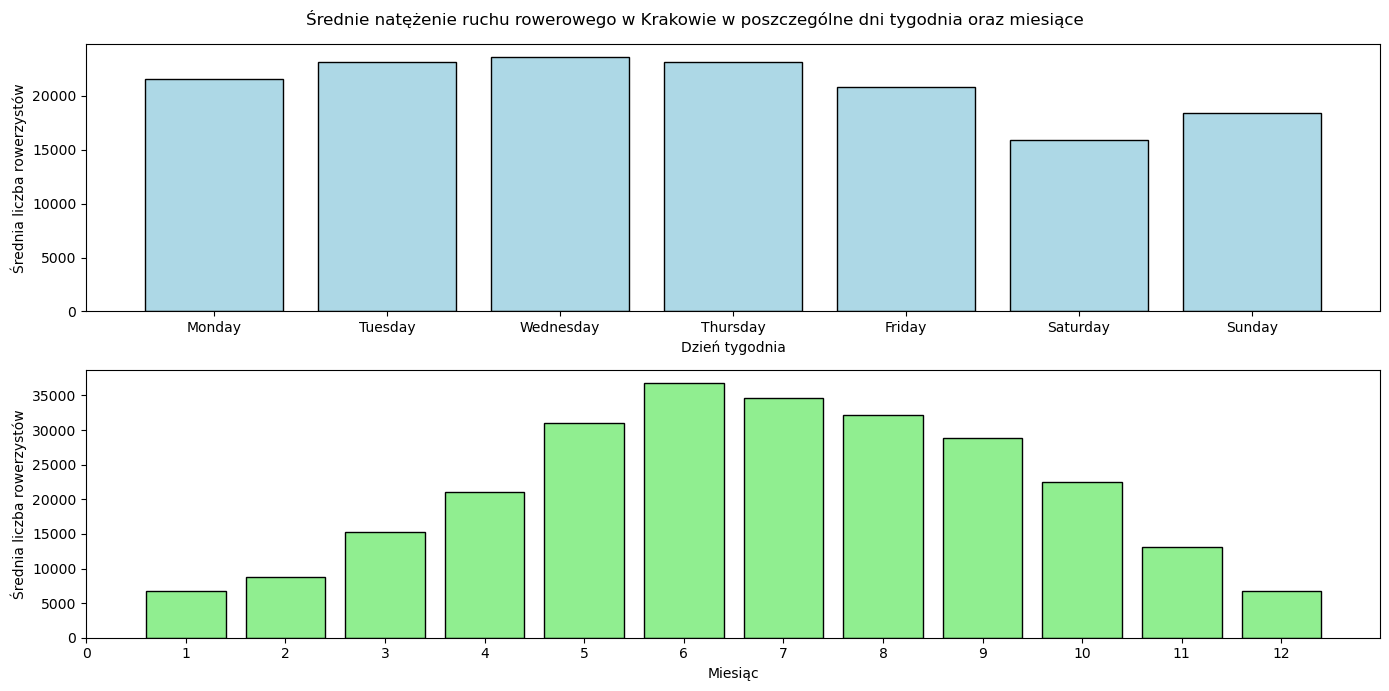

In [272]:
fig, axes = plt.subplots(2, 1, figsize=(14,7))
axes[0].bar(weekdaily['Weekday'], weekdaily['Total'], color='lightblue', edgecolor='black')
axes[0].set_xlabel('Dzień tygodnia')
axes[0].set_ylabel('Średnia liczba rowerzystów')
axes[1].bar(monthly['Miesiąc'], monthly['Total'], color='lightgreen', edgecolor='black')
axes[1].set_xlabel('Miesiąc')
axes[1].set_ylabel('Średnia liczba rowerzystów')
axes[1].set_xticks(np.arange(0, 13, 1))
plt.suptitle('Średnie natężenie ruchu rowerowego w Krakowie w poszczególne dni tygodnia oraz miesiące')
plt.tight_layout()
plt.show()

Można zauważyć, że trend roczny do bólu przypomina rozkład normalny, czego można było się spodziewać, <br>
gdyż wiadomo, że w czerwcu człowiek chętniej wybiera się na rower niż w grudniu <br>
Warto również odnotować, że o dziwo w weekendy jest trochę mniejszy ruch rowerowy niż w tygodniu. <br> 
Należy jednakże przy tym pamiętać, że są to dane dla całego miasta <br>
Tutaj po prostu chodzi o to ze ludzie duzo jezdza do pracy i szkoly, a w weekendy pewnie wybieraja trasy poza miastem <Br>
zeby odpoczac od wielkomiejskiego zgiełku xd

### Poszczególne dni z najwyższym i najniższym ruchem w mieście

In [273]:
most_bikers = df.sort_values(by='Total', ascending=False).head(5)
most_bikers

,Total,is_weekend,Week day,tavg,tmin,tmax,prcp,snow,wspd,wpgt,pres,opady_interp
Date,,,,,,,,,,,,
2021-05-09,55156.0,1,6,13.1,0.1,23.1,0.0,0.0,7.3,24.1,1019.3,0.0
2024-04-07,51120.0,1,6,16.2,7.5,25.4,0.0,0.0,7.2,20.4,1020.0,0.0
2023-07-18,50468.0,0,1,20.3,15.6,25.4,0.0,0.0,11.1,31.5,1018.7,0.0
2023-05-21,50388.0,1,6,18.1,13.4,23.0,0.0,0.0,18.8,42.6,1020.3,0.0
2023-07-04,50293.0,0,1,21.5,15.7,26.4,0.1,0.0,9.7,33.3,1014.2,0.1


In [274]:
least_bikers = df.sort_values(by='Total').head(5)
least_bikers

,Total,is_weekend,Week day,tavg,tmin,tmax,prcp,snow,wspd,wpgt,pres,opady_interp
Date,,,,,,,,,,,,
2023-12-24,709.0,1,6,2.5,-0.3,8.8,6.8,0.0,18.6,42.6,1005.1,6.8
2021-12-25,780.0,1,5,-3.6,-9.7,7.9,5.1,20.0,10.1,48.2,1012.0,5.1
2023-12-03,946.0,1,6,-3.4,-7.0,-2.2,4.0,0.0,20.3,37.0,1019.9,4.0
2023-12-02,997.0,1,5,-2.1,-2.7,-1.0,4.3,180.0,15.5,33.3,1005.2,4.3
2022-12-11,1162.0,1,6,-1.4,-3.4,0.4,4.1,51.0,12.3,31.5,1004.7,4.1


Tutaj możemy zauważyć, że absolutny peak ruchu rowerowego to 9 maja 2021 roku. Jak widać warunki idealne na rower: <br>
niedziela, przyjemne 23 stopnie, bez opadów, lekki wiaterek i wysokie ciśnienie. Warto tutaj odnotować, że mniej więcej <br>
w tym okresie luzowane był obostrzenia covidowe, co mogło również wyjątkowo zachęcić Krakowian do aktywności rowerowej. 

Jeżeli chodzi o najniższe wyniki, to dość oczywiste są 2 pierwsze miejsca w postaci Świąt Bożego Narodzenia, w wodatku przy niskiej temperaturze <br> 
i opadach deszczu, a nawet śniegu


### Rozkład zmiennej objaśnianej
skomentuj jakos rozklad

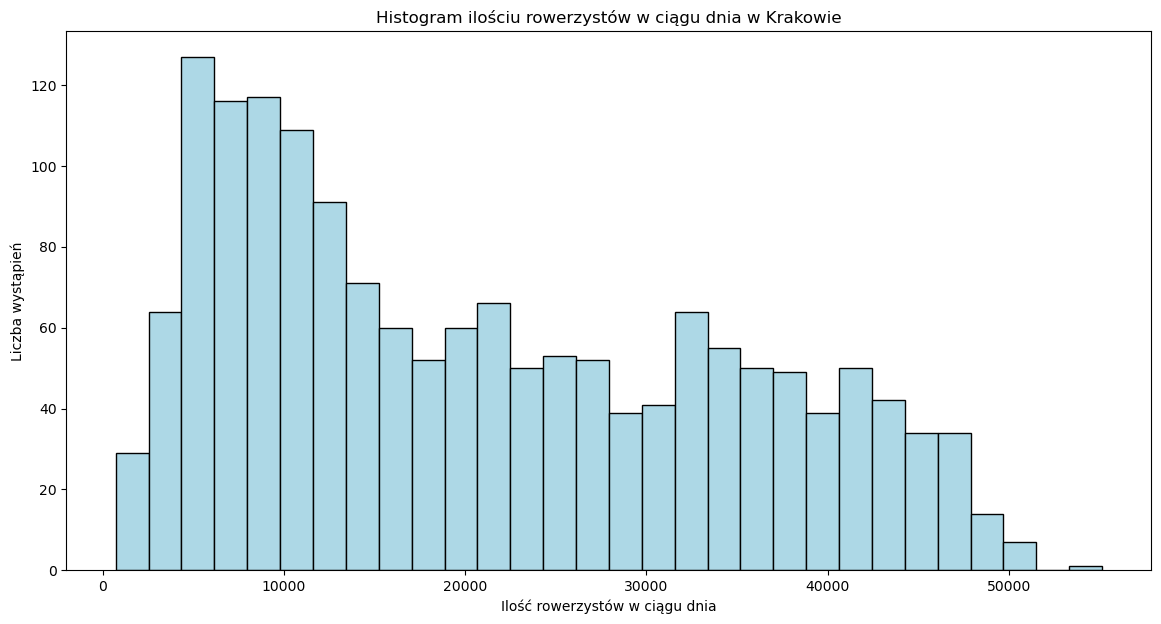

In [279]:
plt.figure(figsize=(14,7))
plt.hist(df['Total'], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Ilość rowerzystów w ciągu dnia')
plt.ylabel('Liczba wystąpień')
plt.title('Histogram ilościu rowerzystów w ciągu dnia w Krakowie')
plt.show()

### Tworzenie modelu predykcyjnego

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.losses import Huber

In [183]:
df.head()

,Total,is_weekend,Week day,tavg,tmin,tmax,prcp,snow,wspd,wpgt,pres,opady_interp
Date,,,,,,,,,,,,
2020-12-09,10005.0,0,2,-1.9,-2.7,-0.5,0.0,0.0,21.6,37.0,1015.6,0.0
2020-12-10,7455.0,0,3,-1.7,-2.8,-0.4,0.0,10.0,15.9,38.9,1010.6,0.0
2020-12-11,7565.0,0,4,-1.2,-3.0,0.2,2.5,20.0,8.6,22.2,1009.4,2.5
2020-12-12,5154.0,1,5,0.2,-1.0,1.3,0.0,10.0,12.2,25.9,1006.5,0.0
2020-12-13,4750.0,1,6,0.0,-0.3,1.3,0.0,0.0,4.8,13.0,1013.9,0.0


Warto dla pewności usunąć brakujące dane, gdyby jeszcze jakieś się znalazły

In [186]:
df = df.dropna()

### Wybór cech
W tym przypadku wybór cech jest bardzo ważny, gdyż trzeba wybrać cechy nieskorelowane ze sobą dla poprawnego działania modelu <br>
Jak wspomniano wyżej poszczególne statystyki temperatury są ze sobą wysoko skorelowane, więc została z nich wybrana tylko maksymalna temperatura, <br>
która najlepiej koreluje z zmienną objaśnianą. Podobnie uczyniono ze statystykami wiatru i wybrano średnią prędkość wiatru. <br>
Dodatkowo wzięto pod uwagę zmienną logiczną mówiącą czy jest weekend czy nie

In [275]:
X = df[['is_weekend', 'tmax', 'snow', 'wspd', 'pres', 'opady_interp']]
y = df['Total']

### Normalizacja cech
Również konieczne działanie, gdyż sieć neuronowa która zostanie stworzona potrzebuje mieć dane znormalizowane, żeby poprawic szybkość i jakośc działania. <br>
W tym celu dane zostały znormalizowane do przedziału [0; 1]

In [189]:
X_Scaler = MinMaxScaler()
X_scaled = X_Scaler.fit_transform(X)
y = y.values.reshape(-1,1)
Y_Scaler = MinMaxScaler()
y_scaled = Y_Scaler.fit_transform(y)

### Podział danych na zbiory 
Dane zostały również podzielone na uczące i testowe

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=100)

### Stworzenie modelu 
Model opiera się na sieci neuronowej, składającej się z warstwy wejściowej, 3 warstw ukrytych mających na celu wykrycie nieliniowych zależności między zmiennymi oraz warstwy wyjściowej, składającej się z 1 neurona dającego nam przewidywaną wartość ilości rowerzystów na ulicach miasta Krakowa

In [193]:
model = Sequential([Input(shape=(X_train.shape[1],)),
                    Dense(16, activation='tanh'),
                    Dense(8, activation='tanh'),
                    Dense(4, activation='tanh'),
                    Dense(1)
                   ])

Następnie model został skompilowany, nauczony oraz przewidziano na nim wartości zapisane w zbiorze testowym

In [194]:
model.compile(optimizer='adam', loss=Huber())

In [195]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

In [196]:
y_pred_scaled = model.predict(X_test)
y_pred = Y_Scaler.inverse_transform(y_pred_scaled)
y_test_original = Y_Scaler.inverse_transform(y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


### Ocena działania modelu
Tu sie napisze, ze model daje calkiem przyzwoite wyniki jako ze mae daje 3840 błąd, a r2 score 0.84 to jest niezle, choc moglo byc lepiej.
Być może przydałoby się więcej danych o pogodzie np. zachmurzenie lub coś jeszcze konrad znajdz czego moglo braknac <br>
Dodatkowo należy pamiętać, że te stacje są rozmieszczone po całym mieście, które nie jest małe, więc to również może nie pomagać, tu tez cos wymysl <br>


In [197]:
mae = mean_absolute_error(y_test_original, y_pred)
mae

3840.960609622947

In [277]:
mae / df['Total'].mean()

0.1836181557441067

tu też się coś napisze, że błąd odbiega o niecałe 20% od wartości średniej to też spoko

In [198]:
r2_score(y_test_original, y_pred)

0.840088110040462

Dodatkowo można zobaczyć proces uczenia modelu. Widać, że model został dobrze nauczony, nie jest przetrenowany, ani niedouczony <br>

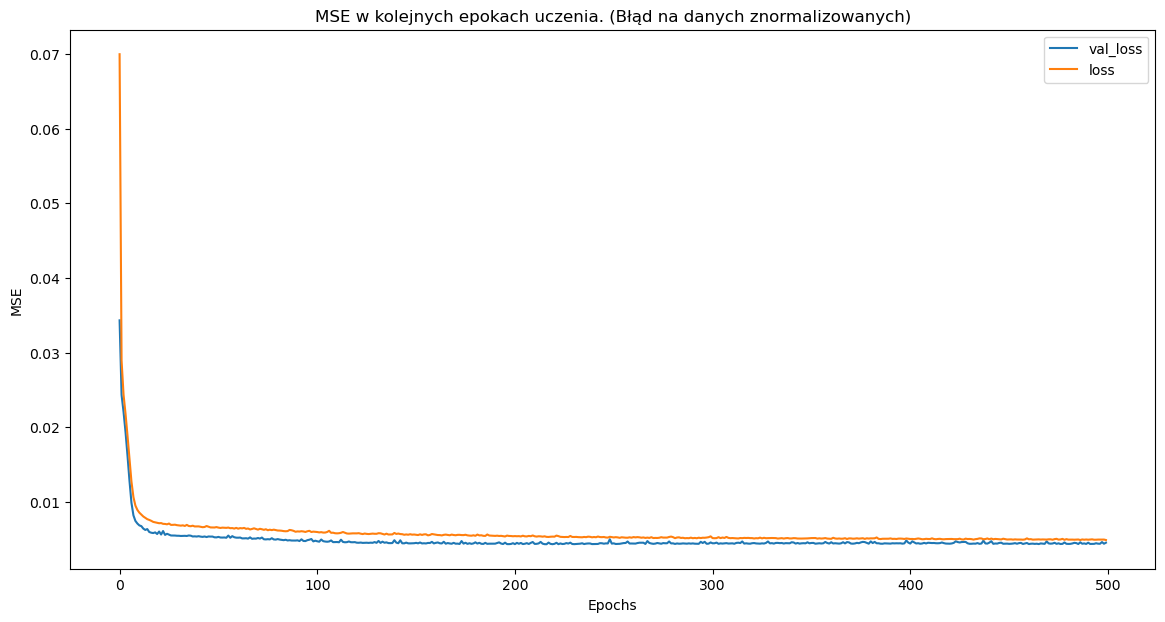

In [278]:
fig = plt.figure(figsize=(14,7))
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.title('MSE w kolejnych epokach uczenia. (Błąd na danych znormalizowanych)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Na sam koniec zapisano model oraz obiekty skalujące do plików w celu stworzenia dashboardu

In [213]:
import joblib
joblib.dump(X_Scaler, 'x_scaler.pkl')
joblib.dump(Y_Scaler, 'y_scaler.pkl')

['y_scaler.pkl']

In [200]:
from keras.models import save_model
save_model(model, 'nn_model.h5')